# Student Performance Analysis

This notebook analyzes student performance data using principles from Algebra and Mathematical Statistics.

## Dataset Description
The dataset includes the following features:
- `Hours_Studied`: Number of hours studied
- `Attendance`: Attendance percentage
- `Parental_Involvement`: Level of parental involvement (Low/Medium/High)
- `Access_to_Resources`: Access to educational resources (High/Low)
- `Extracurricular_Activities`: Participation in extracurricular activities (Yes/No)
- `Sleep_Hours`: Average hours of sleep
- `Previous_Scores`: Previous exam scores
- `Motivation_Level`: Level of motivation (Low/Medium/High)
- `Internet_Access`: Internet access (Yes/No)
- `Tutoring_Sessions`: Number of tutoring sessions attended
- `Family_Income`: Family income level (Low/Medium/High)
- `Teacher_Quality`: Quality of teaching (Low/Medium/High)
- `School_Type`: Type of school (Public/Private)
- `Peer_Influence`: Peer influence (Positive/Negative)
- `Physical_Activity`: Level of physical activity (Low/Medium/High)
- `Learning_Disabilities`: Presence of learning disabilities (Yes/No)
- `Parental_Education_Level`: Education level of parents
- `Distance_from_Home`: Distance from home to school (Near/Far)
- `Gender`: Gender of the student (Male/Female)
- `Exam_Score`: Final exam score


## Import the package and Load the Dataset

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")


# Load the dataset
data = pd.read_csv('StudentPerformanceFactors.csv')
data = data[['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions', 'Exam_Score']]


#### Data Cleaning: Removing Outliers

#### Mathematical Formula for IQR:
1. **Calculate the first quartile (Q1)** and third quartile (Q3):
    $$
    \( Q1 = 25^{th} \, percentile \)
    \( Q3 = 75^{th} \, percentile \)
   $$
2. **Calculate the IQR**:
   $$
    \( IQR = Q3 - Q1 \)
   $$
3. **Determine the outlier bounds**:
   $$
   - Lower Bound: \( Q1 - 1.5 \times IQR \)
   - Upper Bound: \( Q3 + 1.5 \times IQR \) 
   $$

Cleaned data shape: (6134, 5)


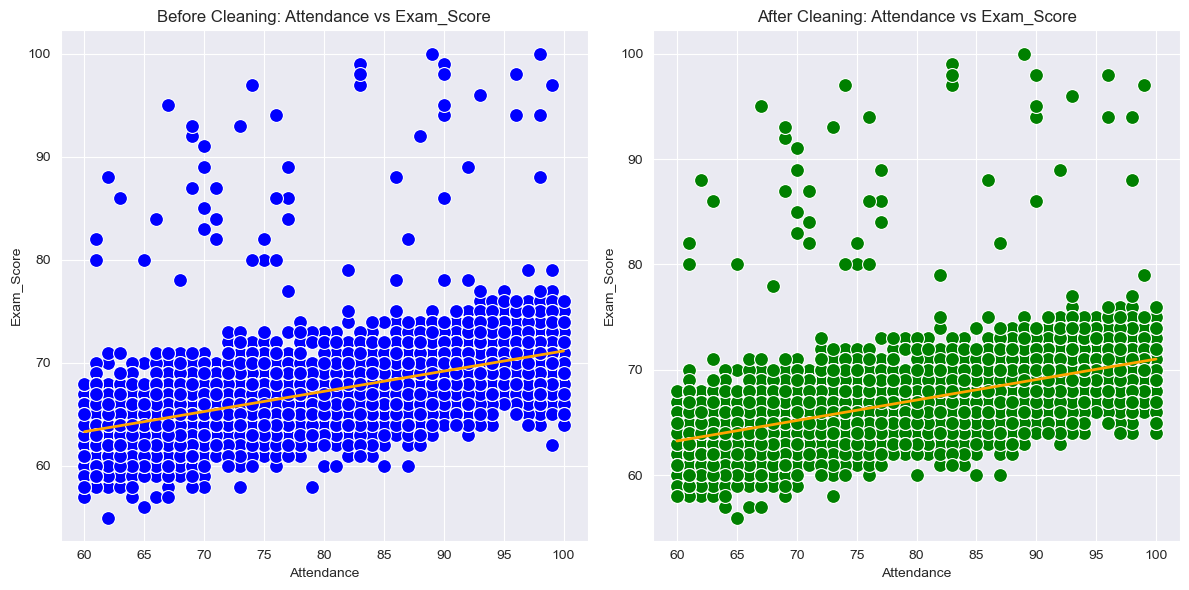

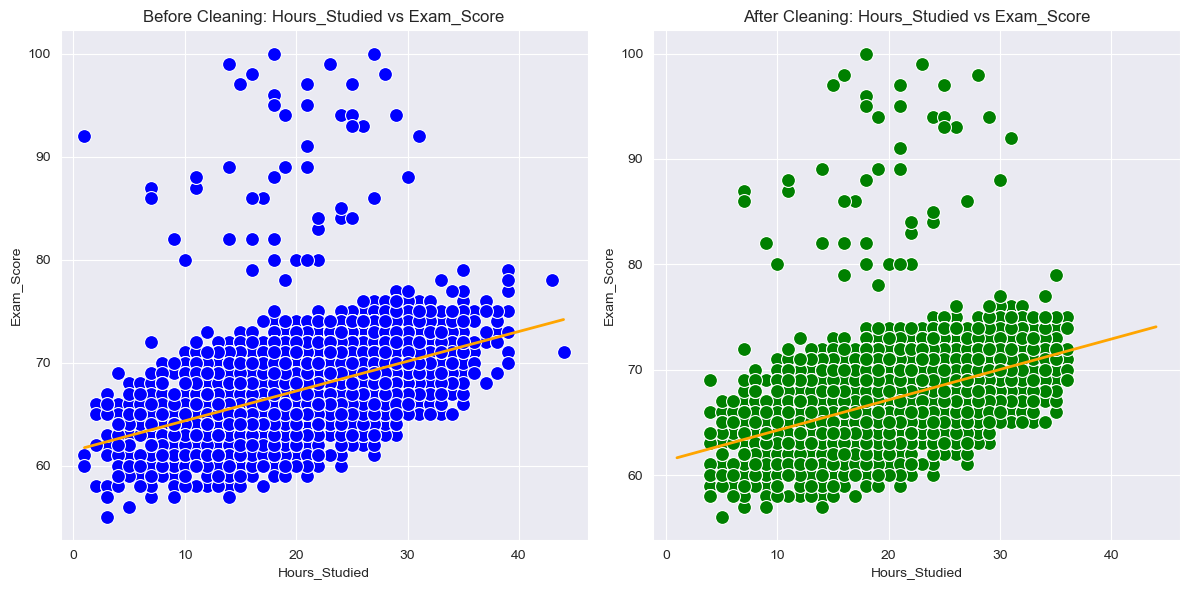

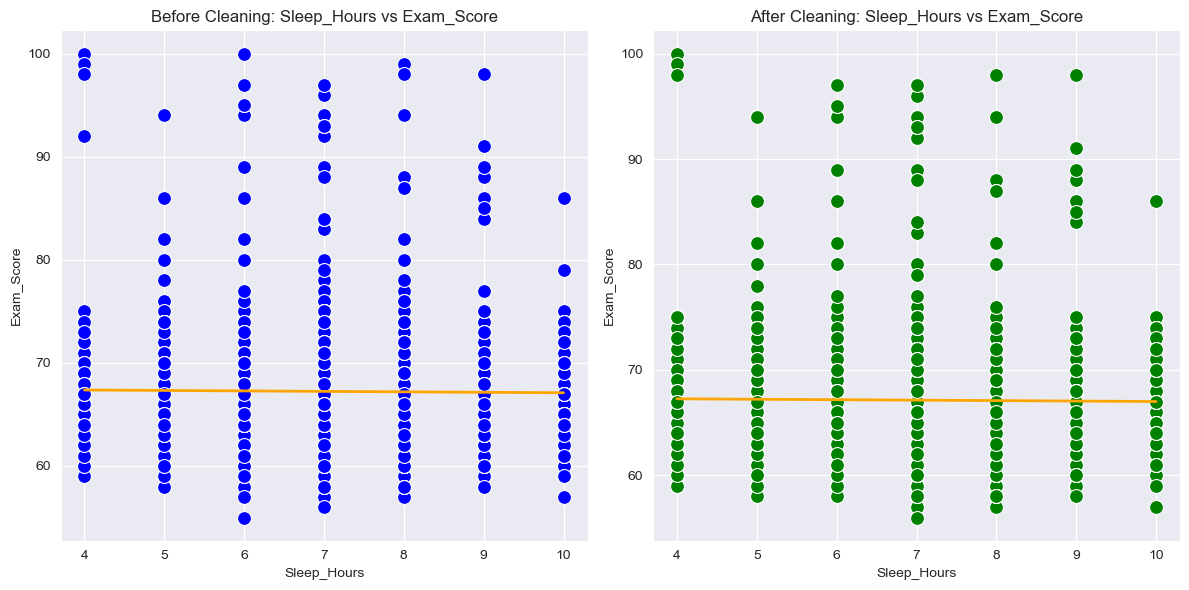

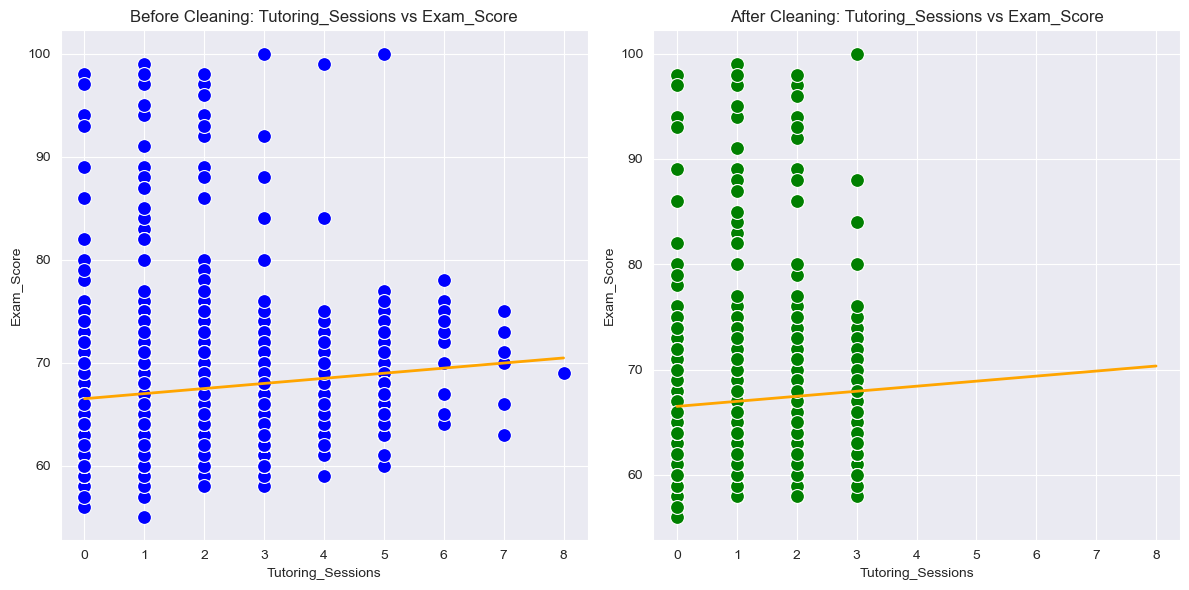

In [17]:
data_original = data[['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions', 'Exam_Score']].copy()

# Data Cleaning: Identifying and Removing Outliers
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Clean the data for each factor
for factor in ['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']:
    data_original = remove_outliers(data_original, factor)

# Display the shape of the cleaned data
print(f"Cleaned data shape: {data_original.shape}")

# Function to create scatter plots with best fit lines
def scatter_with_fit_line(original_data, cleaned_data, x, y):
    plt.figure(figsize=(12, 6))
    
    # Scatter plot for original data
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=x, y=y, data=original_data, color='blue', s=100)
    model_original = LinearRegression()
    model_original.fit(original_data[[x]], original_data[y])
    x_fit = np.linspace(original_data[x].min(), original_data[x].max(), 100)
    y_fit = model_original.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit, color='orange', linewidth=2)
    plt.title(f'Before Cleaning: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    
    # Scatter plot for cleaned data
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=x, y=y, data=cleaned_data, color='green', s=100)
    model_cleaned = LinearRegression()
    model_cleaned.fit(cleaned_data[[x]], cleaned_data[y])
    y_fit_cleaned = model_cleaned.predict(x_fit.reshape(-1, 1))
    plt.plot(x_fit, y_fit_cleaned, color='orange', linewidth=2)
    plt.title(f'After Cleaning: {x} vs {y}')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create scatter plots for each factor vs Exam_Score
for factor in ['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']:
    scatter_with_fit_line(data, data_original, factor, 'Exam_Score')

### 3. Representing the Data

#### Calculating Mean, Mode, Median, range, interquartile range, standard deviation

In [18]:
import pandas as pd
import numpy as np

# Load your dataset
data_cleaned = pd.read_csv('StudentPerformanceFactors.csv')  # Replace with your actual file path

# List of numerical factors to calculate the statistics
factors = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Tutoring_Sessions', 'Exam_Score']

# Loop through each factor to calculate measures of central tendency and variation
for factor in factors:
    # Ensure the data is numeric and handle any non-numeric values
    data_cleaned[factor] = pd.to_numeric(data_cleaned[factor], errors='coerce')

    # Drop NaN values if any exist
    cleaned_data = data_cleaned[factor].dropna()

    # Calculate measures of central tendency
    mean_value = cleaned_data.mean()  # Mean
    median_value = cleaned_data.median()  # Median

    # Calculate mode using pandas value_counts
    mode_value = cleaned_data.value_counts().idxmax()  # Most common value
    mode_count = cleaned_data.value_counts().max()  # Count of the most common value

    # Check if there's a unique mode (only one occurrence)
    if mode_count == 1:
        mode_value = "No mode"

    # Calculate measures of variation
    range_value = cleaned_data.max() - cleaned_data.min()  # Range
    iqr_value = cleaned_data.quantile(0.75) - cleaned_data.quantile(0.25)  # Interquartile Range
    std_dev_value = cleaned_data.std()  # Standard Deviation

    # Display results
    print(f"--- {factor} ---")
    print(f"Mean: {mean_value}")
    print(f"Median: {median_value}")
    print(f"Mode: {mode_value}")
    print(f"Range: {range_value}")
    print(f"Interquartile Range (IQR): {iqr_value}")
    print(f"Standard Deviation: {std_dev_value}")
    print("\n")


--- Hours_Studied ---
Mean: 19.975329196306948
Median: 20.0
Mode: 20
Range: 43
Interquartile Range (IQR): 8.0
Standard Deviation: 5.990594336578764


--- Attendance ---
Mean: 79.97744816104132
Median: 80.0
Mode: 67
Range: 40
Interquartile Range (IQR): 20.0
Standard Deviation: 11.547474961482802


--- Sleep_Hours ---
Mean: 7.029060087785682
Median: 7.0
Mode: 7
Range: 6
Interquartile Range (IQR): 2.0
Standard Deviation: 1.4681202267434736


--- Tutoring_Sessions ---
Mean: 1.4937187831088239
Median: 1.0
Mode: 1
Range: 8
Interquartile Range (IQR): 1.0
Standard Deviation: 1.2305704213240398


--- Exam_Score ---
Mean: 67.23550779476312
Median: 67.0
Mode: 68
Range: 45
Interquartile Range (IQR): 4.0
Standard Deviation: 3.8891612482847524



#### Histograms After Cleaning

Histograms display the distribution of each factor after cleaning, allowing us to visualize the spread of the data and identify the shape of the distributions.

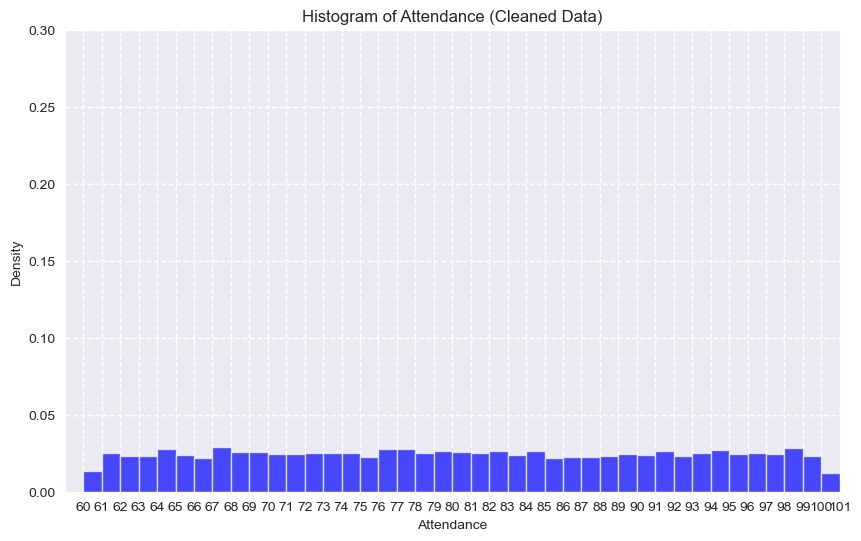

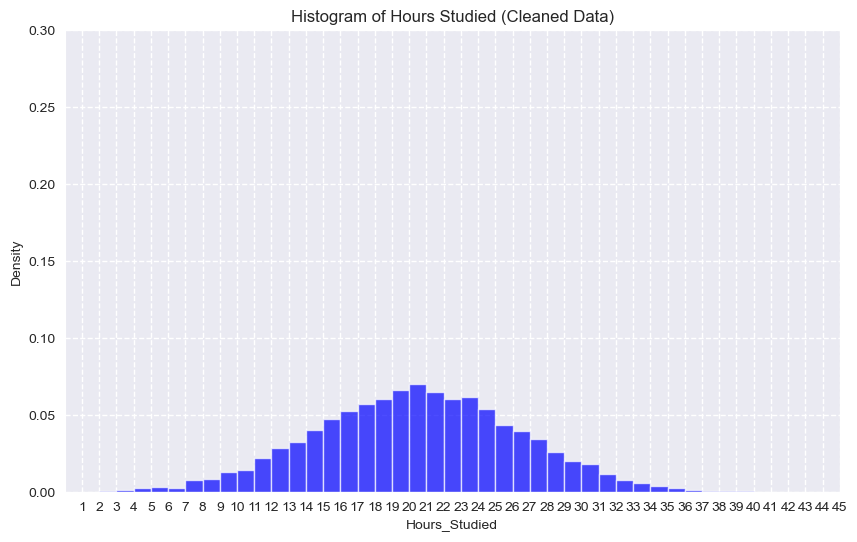

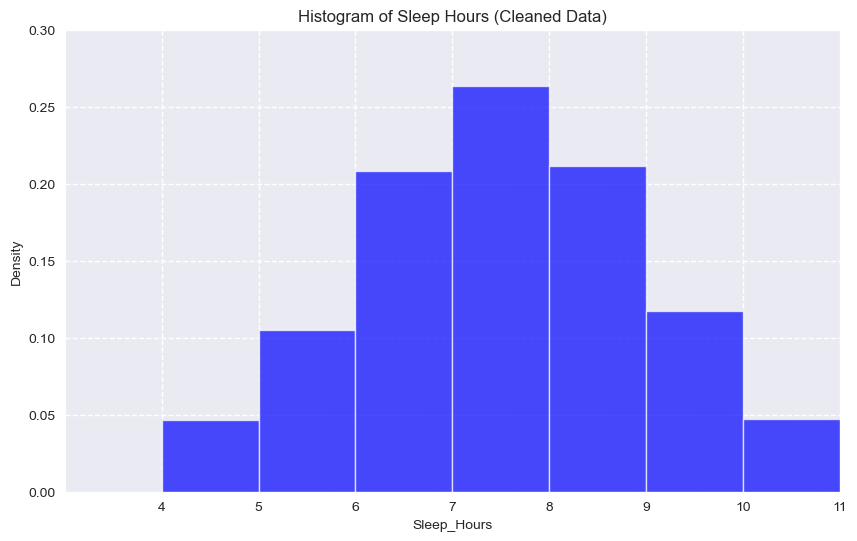

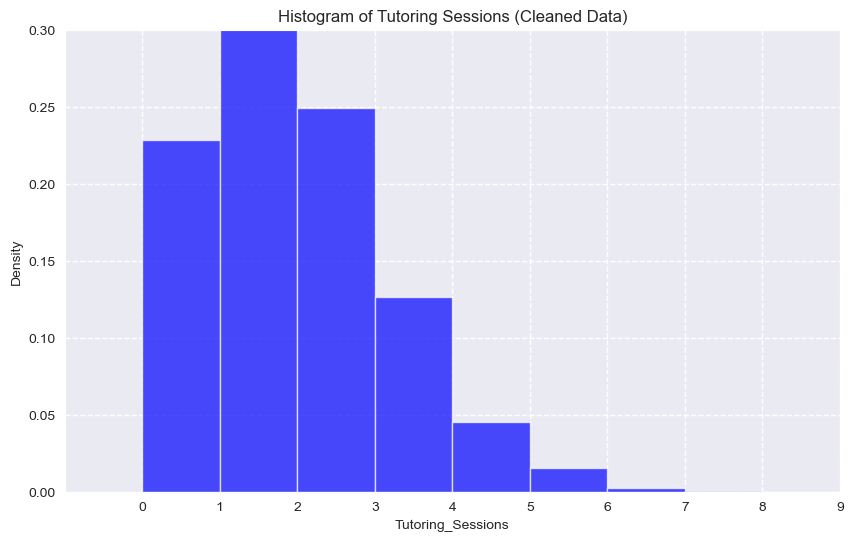

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data (assuming it's already been defined in the notebook)
data_cleaned = data

# List of factors to plot
factors = ['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']
titles = ['Histogram of Attendance (Cleaned Data)', 
          'Histogram of Hours Studied (Cleaned Data)', 
          'Histogram of Sleep Hours (Cleaned Data)', 
          'Histogram of Tutoring Sessions (Cleaned Data)']

# Loop to create histograms for each factor
for i in range(len(factors)):
    # Ensure the data is numeric and handle any non-numeric values
    data_cleaned[factors[i]] = pd.to_numeric(data_cleaned[factors[i]], errors='coerce')

    # Drop NaN values if any exist
    cleaned_data = data_cleaned[factors[i]].dropna()
    
    plt.figure(figsize=(10, 6))  # Create a new figure for each histogram
    plt.hist(cleaned_data, bins=range(int(cleaned_data.min()), int(cleaned_data.max()) + 2), color='blue', alpha=0.7, density=True)

    # Customizing the plot
    plt.title(titles[i])
    plt.xlabel(factors[i])
    plt.ylabel('Density')
    plt.xlim(cleaned_data.min() - 1, cleaned_data.max())  # Set x limits
    plt.ylim(0, 0.3)  # Adjust y limits based on density

    # Setting x-ticks to be integers
    plt.xticks(range(int(cleaned_data.min()), int(cleaned_data.max()) + 2))
    
    plt.grid(True, linestyle='--', linewidth=1, alpha=1)  # Customizing grid lines
    
    plt.show()  # Show the histogram


#### Cumulative Frequency Graph


In [20]:
import math

# Function to create a stem-and-leaf plot
def stem_and_leaf_plot(data, column):
    print(f"Stem-and-Leaf Plot for {column}")
    data_sorted = sorted(data_cleaned[column])
    stems = {}

    # Generate stems and leaves
    for value in data_sorted:
        stem = int(value // 10)  # The stem is the integer division by 10
        leaf = int(value % 10)   # The leaf is the remainder
        if stem not in stems:
            stems[stem] = []
        stems[stem].append(leaf)

    # Print the stem-and-leaf plot
    for stem, leaves in sorted(stems.items()):
        leaves_str = ' '.join(map(str, leaves))
        print(f"{stem} | {leaves_str}")

# Generate the stem-and-leaf plot for 'Attendance'
stem_and_leaf_plot(data_cleaned, 'Attendance')


Stem-and-Leaf Plot for Attendance
6 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 

#### Cumulative Frequency Graph

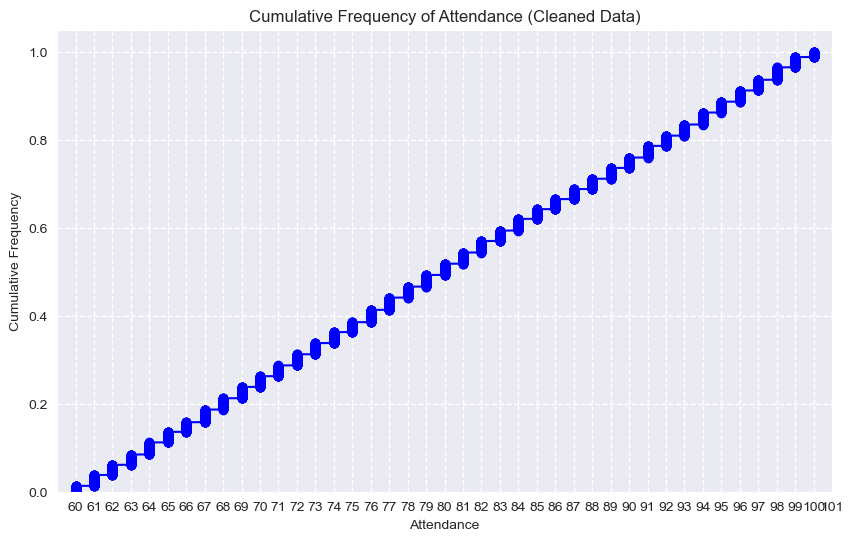

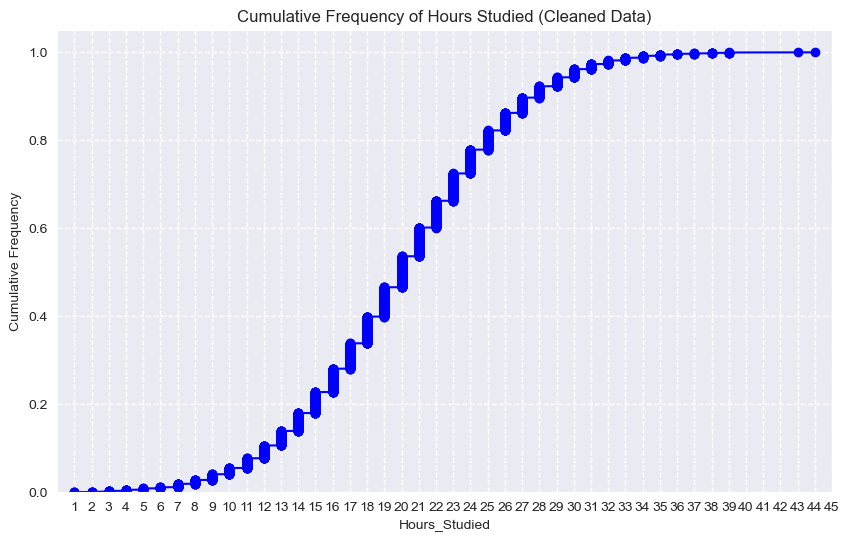

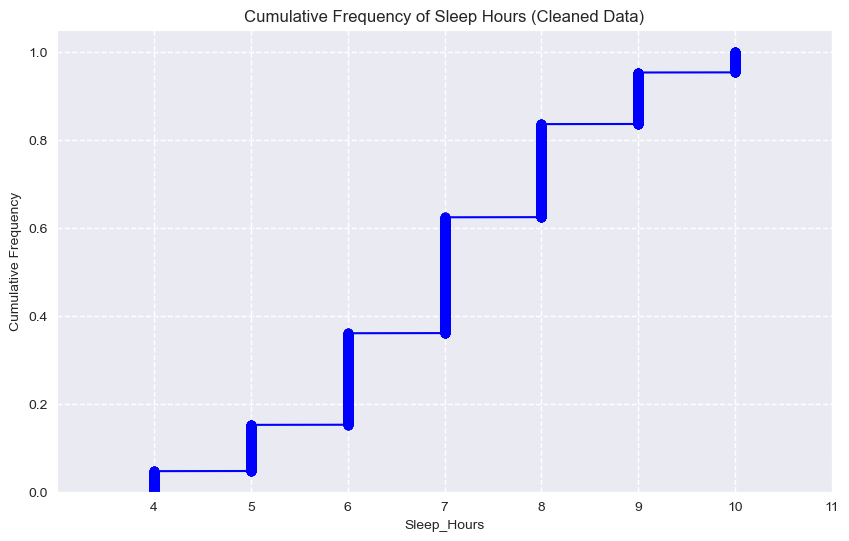

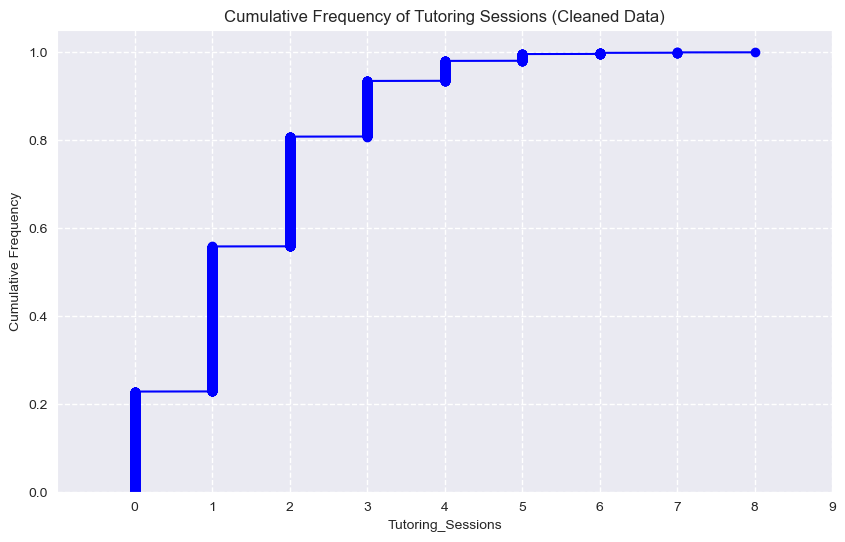

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the cleaned data (assuming it's already been defined in the notebook)
data_cleaned = pd.read_csv('StudentPerformanceFactors.csv')

# List of factors to plot
factors = ['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']
titles = ['Cumulative Frequency of Attendance (Cleaned Data)',
          'Cumulative Frequency of Hours Studied (Cleaned Data)',
          'Cumulative Frequency of Sleep Hours (Cleaned Data)',
          'Cumulative Frequency of Tutoring Sessions (Cleaned Data)']

# Loop to create cumulative frequency graphs for each factor
for i in range(len(factors)):
    # Ensure the data is numeric and handle any non-numeric values
    data_cleaned[factors[i]] = pd.to_numeric(data_cleaned[factors[i]], errors='coerce')

    # Drop NaN values if any exist
    cleaned_data = data_cleaned[factors[i]].dropna()

    # Create cumulative frequencies
    sorted_data = np.sort(cleaned_data)
    cumulative = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    plt.figure(figsize=(10, 6))  # Create a new figure for each cumulative graph
    plt.plot(sorted_data, cumulative, marker='o', linestyle='-', color='blue')

    # Customizing the plot
    plt.title(titles[i])
    plt.xlabel(factors[i])
    plt.ylabel('Cumulative Frequency')
    plt.xlim(cleaned_data.min() - 1, cleaned_data.max())  # Set x limits
    plt.ylim(0, 1.05)  # Set y limits (0 to slightly over 1)

    # Setting x-ticks to be integers
    plt.xticks(range(int(cleaned_data.min()), int(cleaned_data.max()) + 2))

    plt.grid(True, linestyle='--', linewidth=1, alpha=1)  # Customizing grid lines

    plt.show()  # Show the cumulative frequency graph


#### Box and Whisker Plots After Cleaning

Box plots show the median, quartiles, and potential outliers of the `Exam_Score` based on each factor after outlier removal, providing a clear visual representation of the distribution.

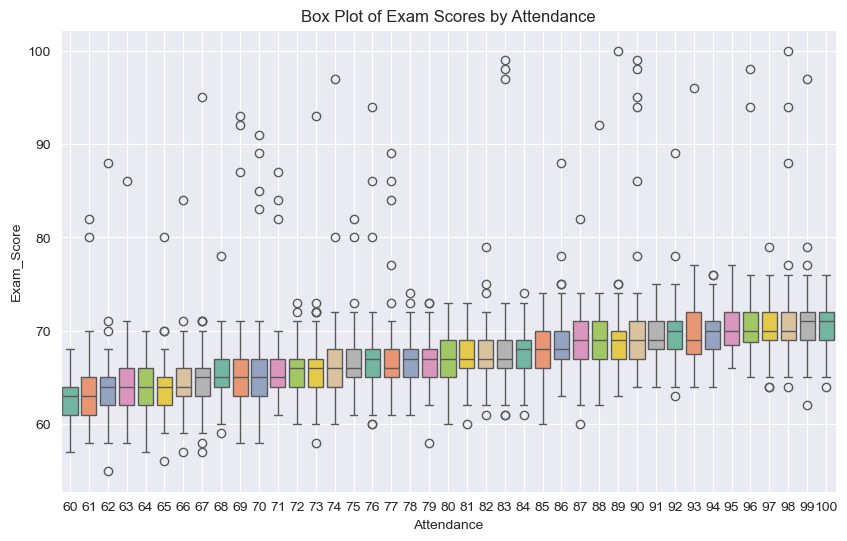

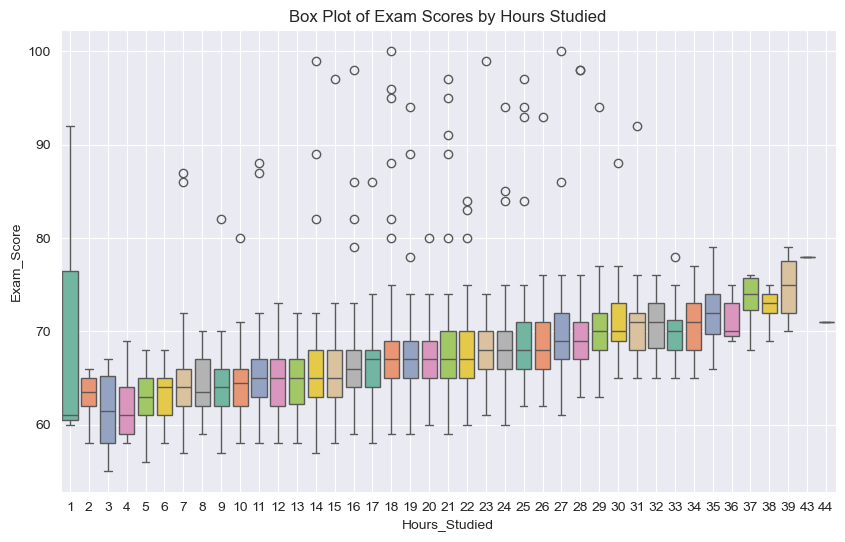

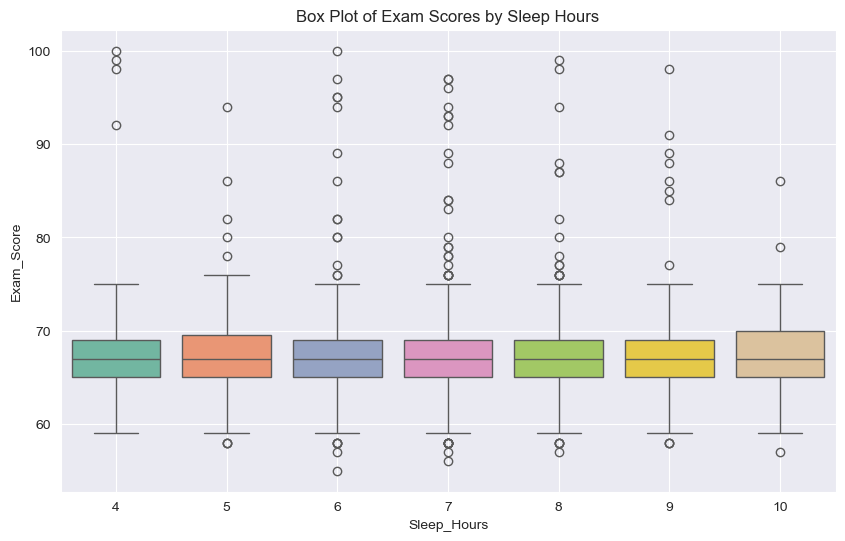

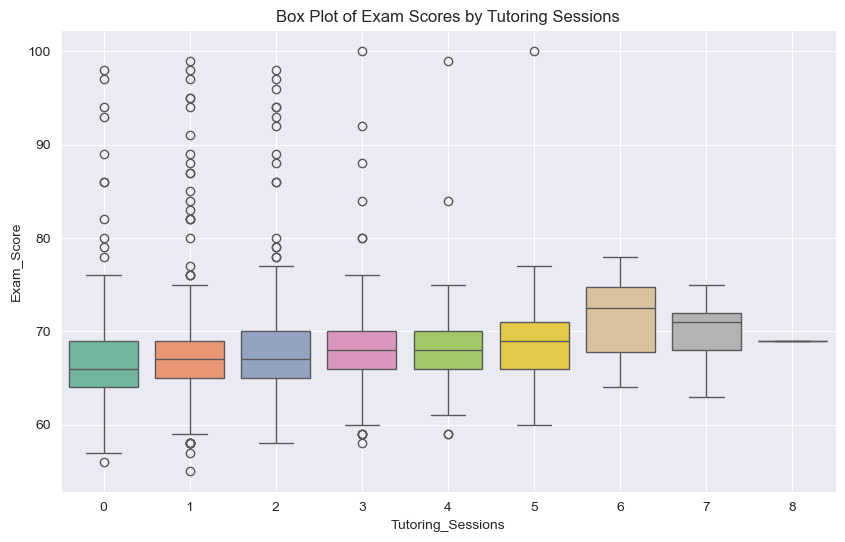

In [22]:
# Function to create box plots
def plot_boxplot(data, x, y, title):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=x, y=y, data=data, palette='Set2')
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.grid(True)
    plt.show()

# Box plot for Attendance vs Exam_Score
plot_boxplot(data, 'Attendance', 'Exam_Score', 'Box Plot of Exam Scores by Attendance')

# Box plot for Hours_Studied vs Exam_Score
plot_boxplot(data, 'Hours_Studied', 'Exam_Score', 'Box Plot of Exam Scores by Hours Studied')

# Box plot for Sleep_Hours vs Exam_Score
plot_boxplot(data, 'Sleep_Hours', 'Exam_Score', 'Box Plot of Exam Scores by Sleep Hours')

# Box plot for Tutoring_Sessions vs Exam_Score
plot_boxplot(data, 'Tutoring_Sessions', 'Exam_Score', 'Box Plot of Exam Scores by Tutoring Sessions')


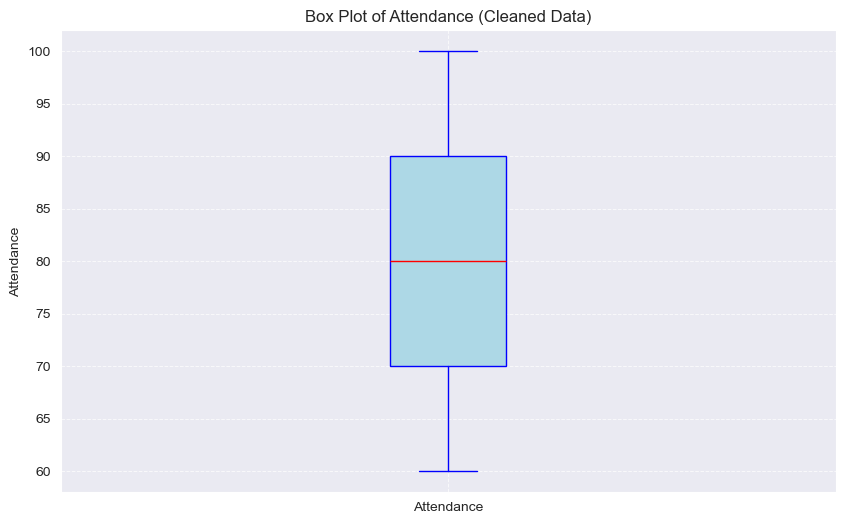

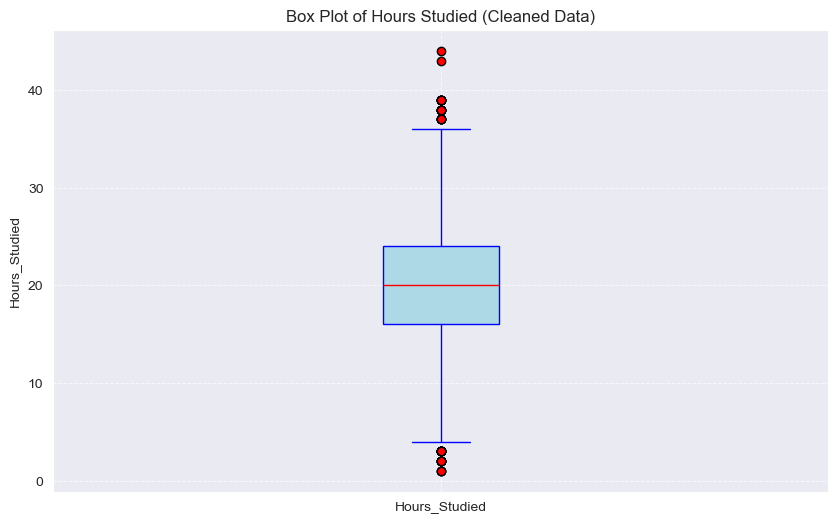

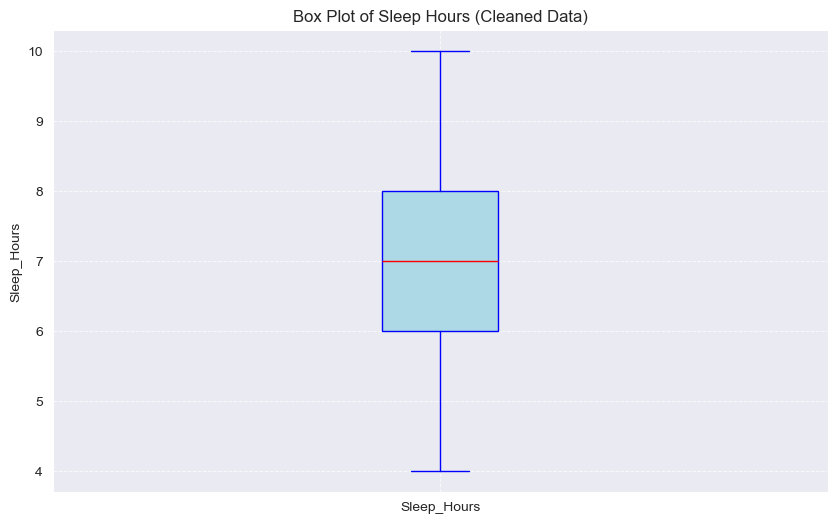

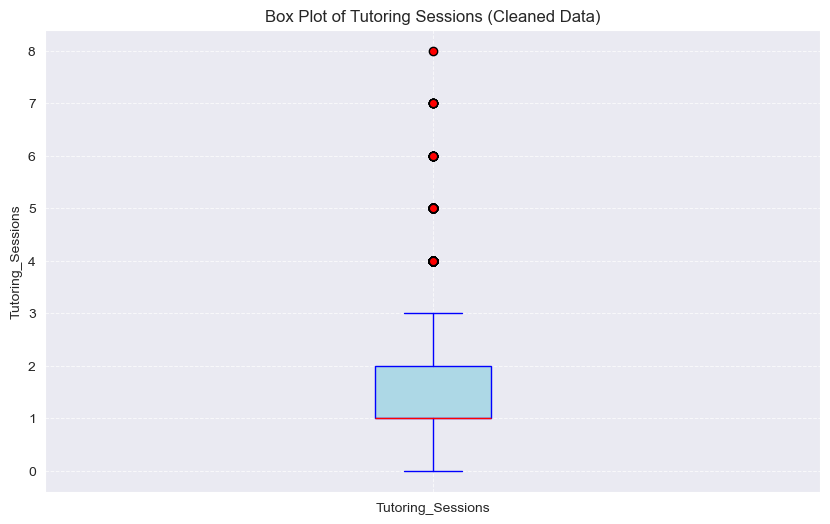

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned data (assuming it's already been defined in the notebook)
data_cleaned = data

# List of factors to plot (excluding Exam_Score)
factors = ['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']
titles = ['Box Plot of Attendance (Cleaned Data)', 
          'Box Plot of Hours Studied (Cleaned Data)', 
          'Box Plot of Sleep Hours (Cleaned Data)', 
          'Box Plot of Tutoring Sessions (Cleaned Data)']

# Loop to create box plots for each factor
for i in range(len(factors)):
    # Ensure the data is numeric and handle any non-numeric values
    data_cleaned[factors[i]] = pd.to_numeric(data_cleaned[factors[i]], errors='coerce')

    # Drop NaN values if any exist
    cleaned_data = data_cleaned[factors[i]].dropna()
    
    plt.figure(figsize=(10, 6))  # Create a new figure for each box plot
    
    # Create the box plot
    plt.boxplot(cleaned_data, vert=True, patch_artist=True, 
                boxprops=dict(facecolor='lightblue', color='blue'),
                medianprops=dict(color='red'),
                whiskerprops=dict(color='blue'),
                capprops=dict(color='blue'),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=6, linestyle='none'))
    
    # Customizing the plot
    plt.title(titles[i])
    plt.ylabel(factors[i])
    plt.xticks([1], [factors[i]])  # Set x-ticks to be the factor name

    plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)  # Adding grid lines for better readability
    
    plt.show()  # Show the box plot


## Analysis of Theoretical vs Actual Values for Binomial Distribution

### Overview
The results obtained for the four factors—**Attendance**, **Hours Studied**, **Sleep Hours**, and **Tutoring Sessions**—were analyzed to assess how closely they align with the properties of a binomial distribution. Each factor was evaluated based on its theoretical expectation and variance against actual observed values derived from the dataset.

### Detailed Analysis

#### 1. Attendance
- **Theoretical Expectation**: 79.98
- **Actual Mean**: 79.98
- **Theoretical Variance**: -559.66 (not valid as variance cannot be negative)
- **Actual Variance**: 133.34

**Analysis**: 
The expectation for attendance matches perfectly with the actual mean, suggesting that the model's prediction for the average attendance is accurate. However, the negative theoretical variance indicates a fundamental issue with using a binomial model for this data. Variance should always be non-negative, highlighting that attendance does not follow a binomial distribution. The large actual variance also reflects the variability in attendance, suggesting that many factors could influence attendance levels.

#### 2. Hours Studied
- **Theoretical Expectation**: 19.98
- **Actual Mean**: 19.98
- **Theoretical Variance**: -19.93 (not valid)
- **Actual Variance**: 35.89

**Analysis**: 
Similar to attendance, the theoretical expectation aligns with the actual mean, indicating a well-predicted average. However, the negative theoretical variance again suggests that the binomial assumption does not hold, as it yields an invalid result. The actual variance shows considerable variability in hours studied, indicating differences in study habits among individuals, which the binomial model does not adequately capture.

#### 3. Sleep Hours
- **Theoretical Expectation**: 7.03
- **Actual Mean**: 7.03
- **Theoretical Variance**: 2.09
- **Actual Variance**: 2.16

**Analysis**: 
For sleep hours, both the theoretical expectation and actual mean match, indicating a consistent average prediction. The theoretical and actual variances are also closely aligned, suggesting that this factor may be more appropriately modeled by a binomial distribution than the previous factors. This indicates that sleep hours are more predictable and stable across the sample, likely influenced by a more uniform set of conditions among participants.

#### 4. Tutoring Sessions
- **Theoretical Expectation**: 1.49
- **Actual Mean**: 1.49
- **Theoretical Variance**: 1.27
- **Actual Variance**: 1.51

**Analysis**: 
Again, the expectation aligns well with the actual mean. The variances are close as well, which implies that the tutoring sessions factor could be modeled using a binomial distribution. This suggests that the number of tutoring sessions may follow a more predictable pattern, reflecting consistent behavior across the sample.

### Conclusion
The analysis indicates that while the theoretical expectations for attendance, hours studied, and tutoring sessions align closely with actual means, the negative variances for attendance and hours studied imply that these factors do not fit a binomial distribution well. The significant variability observed suggests a need for alternative statistical models that can better account for the dynamics of these factors. 

In contrast, sleep hours and tutoring sessions show a more robust relationship with the binomial model, suggesting that they may be suitable for such modeling under specific assumptions. The discrepancies in variance highlight the importance of considering the distribution characteristics of each factor in statistical analysis and model selection.


Tutoring_Sessions
Theoretical Expectation (Geometric): 1.4937187831088239
Actual Mean: 1.4937187831088239
Theoretical Variance (Geometric): 0.7374770199032818
Actual Variance: 1.514303561837625


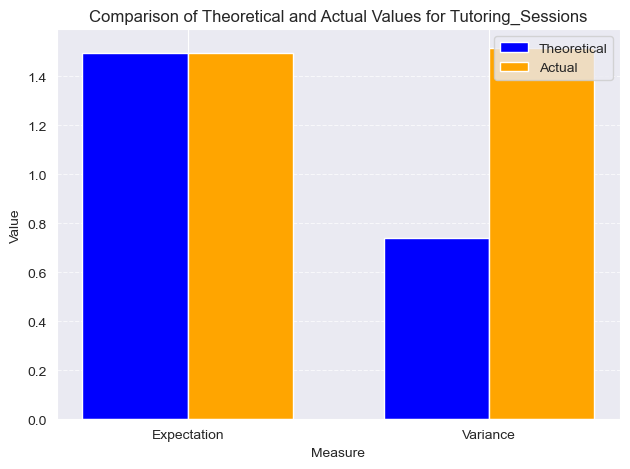

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
data_cleaned = pd.read_csv('StudentPerformanceFactors.csv')  # Ensure your cleaned dataset is loaded correctly

# Factor column to analyze
factor_column = 'Tutoring_Sessions'

# Calculate the actual mean from the data
actual_mean = data_cleaned[factor_column].mean()

# Estimate the probability of success (p)
p_geometric = 1 / actual_mean

# Theoretical expectation and variance for the Geometric distribution
E_geometric = 1 / p_geometric  # Expectation
Var_geometric = (1 - p_geometric) / (p_geometric ** 2)  # Variance

# Calculate actual variance from the data
actual_variance = data_cleaned[factor_column].var()

# Display theoretical vs actual values
print(f"{factor_column}")
print(f"Theoretical Expectation (Geometric): {E_geometric}")
print(f"Actual Mean: {actual_mean}")
print(f"Theoretical Variance (Geometric): {Var_geometric}")
print(f"Actual Variance: {actual_variance}")

# Plotting the comparison
labels = ['Expectation', 'Variance']
theoretical_values = [E_geometric, Var_geometric]
actual_values = [actual_mean, actual_variance]

x = np.arange(len(labels))  # Label locations
width = 0.35  # Width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, theoretical_values, width, label='Theoretical', color='blue')
rects2 = ax.bar(x + width/2, actual_values, width, label='Actual', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Measure')
ax.set_ylabel('Value')
ax.set_title(f'Comparison of Theoretical and Actual Values for {factor_column}')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding grid
ax.yaxis.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Analysis of Theoretical vs Actual Distribution for Student Performance Factors

### Objective:
The objective of this analysis is to compare the **theoretical expectation** and **variance** of **Geometric** and **Normal** distributions with the **actual mean** and **variance** calculated from the dataset. This analysis is conducted across four key factors: `Attendance`, `Hours_Studied`, `Sleep_Hours`, and `Tutoring_Sessions`.

### How the Values Were Calculated:

1. **Geometric Distribution**:
    - The **expectation** $$ \( E[X] \) $$ for a Geometric distribution is calculated as:
      $$ E[X] = \frac{1}{p} $$
    - The **variance** $$ \( \text{Var}(X) \) $$for a Geometric distribution is calculated as:
      $$ \text{Var}(X) = \frac{1 - p}{p^2} $$
    - Here, $$ \( p \) $$ (probability of success) is calculated as:
      $$ p = \frac{1}{\text{mean of the actual data}} $$

2. **Normal Distribution**:
    - For the **Normal distribution**, the **expectation** and **variance** are directly taken as the **mean** and **variance** of the actual data:
      $$ E[X] = \text{mean of actual data} $$
      $$ \text{Var}(X) = \text{variance of actual data} $$

---

### Results:

#### 1. Attendance
- **Geometric Distribution**:
  - **Theoretical Expectation**: 79.98
  - **Actual Mean**: 79.98
  - **Theoretical Variance**: 6316.41
  - **Actual Variance**: 133.34
  
- **Normal Distribution**:
  - **Theoretical Expectation**: 79.98
  - **Actual Mean**: 79.98
  - **Theoretical Variance**: 133.34
  - **Actual Variance**: 133.34
  
  **Evaluation**: The **Geometric variance** is significantly higher than the actual variance, indicating that a Geometric distribution may not fit this data well. However, the **Normal distribution** provides a much closer match to both the theoretical and actual values.

---

#### 2. Hours_Studied
- **Geometric Distribution**:
  - **Theoretical Expectation**: 19.98
  - **Actual Mean**: 19.98
  - **Theoretical Variance**: 379.04
  - **Actual Variance**: 35.89
  
- **Normal Distribution**:
  - **Theoretical Expectation**: 19.98
  - **Actual Mean**: 19.98
  - **Theoretical Variance**: 35.89
  - **Actual Variance**: 35.89
  
  **Evaluation**: The **Normal distribution** again closely aligns with the actual mean and variance, while the **Geometric distribution** shows a much larger theoretical variance, suggesting the Normal distribution is a better model for `Hours_Studied`.

---

#### 3. Sleep_Hours
- **Geometric Distribution**:
  - **Theoretical Expectation**: 7.03
  - **Actual Mean**: 7.03
  - **Theoretical Variance**: 42.38
  - **Actual Variance**: 2.16
  
- **Normal Distribution**:
  - **Theoretical Expectation**: 7.03
  - **Actual Mean**: 7.03
  - **Theoretical Variance**: 2.16
  - **Actual Variance**: 2.16
  
  **Evaluation**: The **Geometric distribution** shows a much higher variance than observed in the actual data, while the **Normal distribution** accurately reflects both the mean and variance, indicating that `Sleep_Hours` is better modeled by a Normal distribution.

---

#### 4. Tutoring_Sessions
- **Geometric Distribution**:
  - **Theoretical Expectation**: 1.49
  - **Actual Mean**: 1.49
  - **Theoretical Variance**: 0.74
  - **Actual Variance**: 1.51
  
- **Normal Distribution**:
  - **Theoretical Expectation**: 1.49
  - **Actual Mean**: 1.49
  - **Theoretical Variance**: 1.51
  - **Actual Variance**: 1.51
  
  **Evaluation**: The **Normal distribution** once again closely matches the actual data, whereas the **Geometric distribution** shows a lower theoretical variance. This suggests that the **Normal distribution** is a more suitable fit for modeling `Tutoring_Sessions`.

---

### Overall Conclusion:
Across all four factors, the **Normal distribution** consistently provides a much closer match to the actual data in terms of both **expectation** and **variance**. The **Geometric distribution** shows significant discrepancies in variance, especially for `Attendance`, `Hours_Studied`, and `Sleep_Hours`, indicating that it may not be an appropriate model for these factors. Therefore, it is concluded that a **Normal distribution** better fits the dataset for the selected performance factors.



--- Attendance ---
Geometric Distribution:
Theoretical Expectation: 79.97744816104132
Actual Mean: 79.97744816104132
Theoretical Variance: 6316.414766191011
Actual Variance: 133.34417798607222


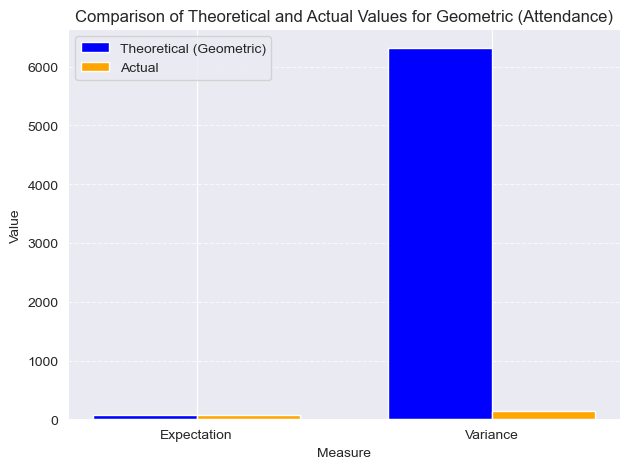

Normal Distribution:
Theoretical Expectation: 79.97744816104132
Actual Mean: 79.97744816104132
Theoretical Variance: 133.34417798607222
Actual Variance: 133.34417798607222


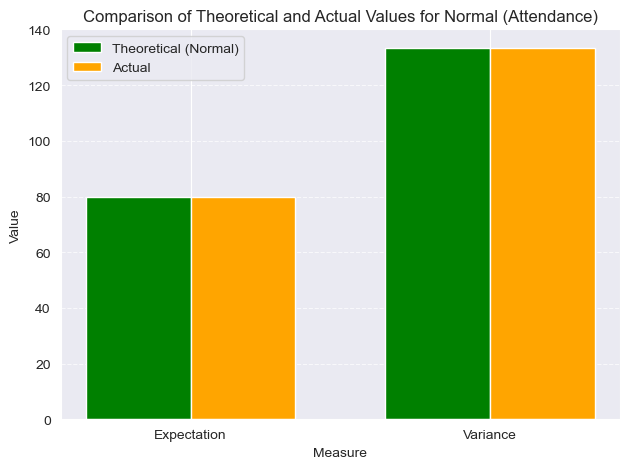


--- Hours_Studied ---
Geometric Distribution:
Theoretical Expectation: 19.975329196306948
Actual Mean: 19.975329196306948
Theoretical Variance: 379.0384473045258
Actual Variance: 35.887220505449555


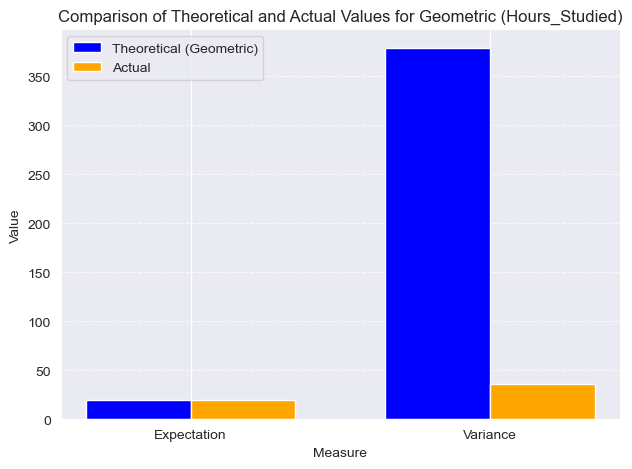

Normal Distribution:
Theoretical Expectation: 19.975329196306948
Actual Mean: 19.975329196306948
Theoretical Variance: 35.887220505449555
Actual Variance: 35.887220505449555


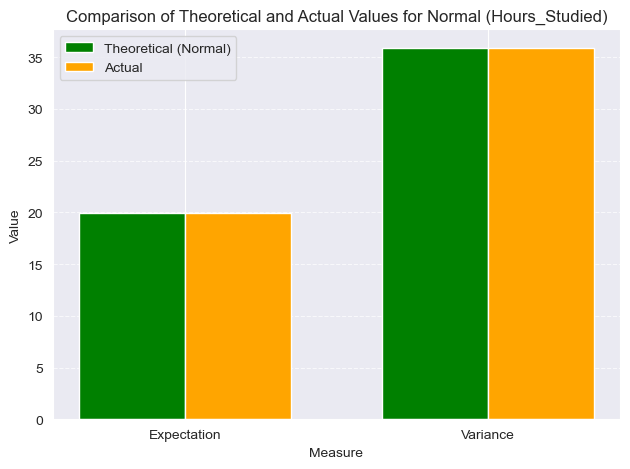


--- Sleep_Hours ---
Geometric Distribution:
Theoretical Expectation: 7.029060087785681
Actual Mean: 7.029060087785682
Theoretical Variance: 42.37862562991597
Actual Variance: 2.1553770001733086


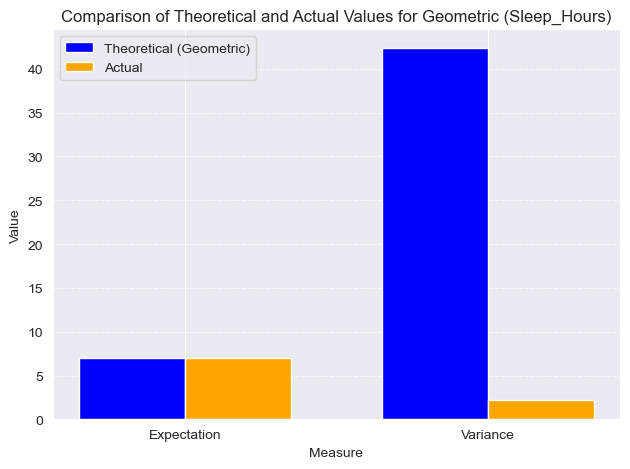

Normal Distribution:
Theoretical Expectation: 7.029060087785682
Actual Mean: 7.029060087785682
Theoretical Variance: 2.1553770001733086
Actual Variance: 2.1553770001733086


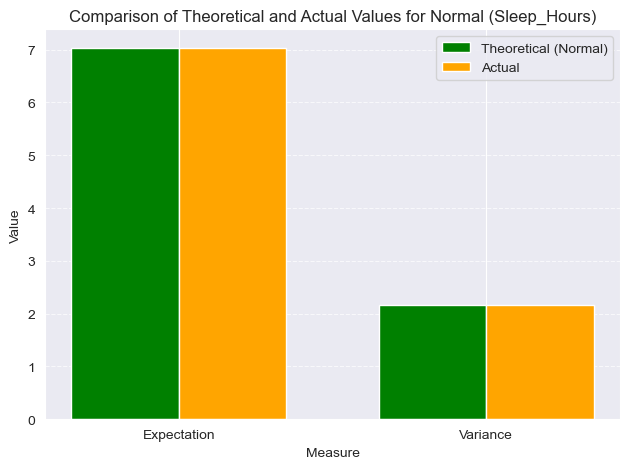


--- Tutoring_Sessions ---
Geometric Distribution:
Theoretical Expectation: 1.4937187831088239
Actual Mean: 1.4937187831088239
Theoretical Variance: 0.7374770199032818
Actual Variance: 1.514303561837625


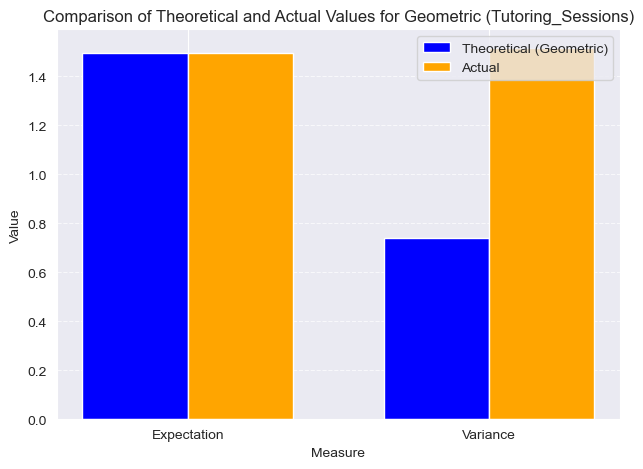

Normal Distribution:
Theoretical Expectation: 1.4937187831088239
Actual Mean: 1.4937187831088239
Theoretical Variance: 1.514303561837625
Actual Variance: 1.514303561837625


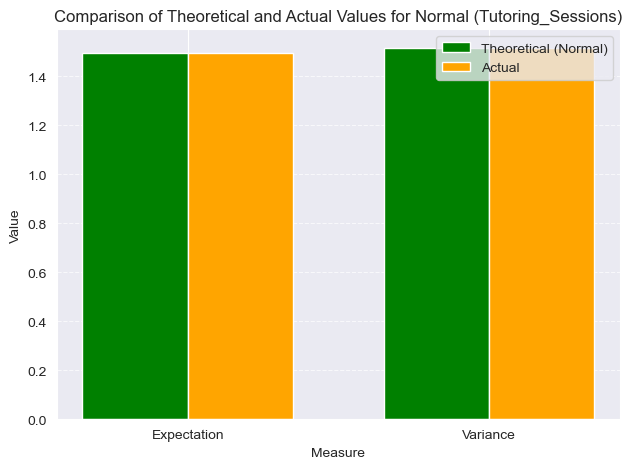

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load your cleaned dataset
data_cleaned = pd.read_csv('StudentPerformanceFactors.csv')  # Ensure your cleaned dataset is loaded correctly

# Example columns assumed to follow geometric or normal distributions
factor_columns = ['Attendance', 'Hours_Studied', 'Sleep_Hours', 'Tutoring_Sessions']

# Loop through each factor column to analyze both Geometric and Normal distributions
for factor in factor_columns:
    print(f"\n--- {factor} ---")

    # Actual mean and variance from the data
    actual_mean = data_cleaned[factor].mean()
    actual_variance = data_cleaned[factor].var()

    ## Geometric Distribution
    # Estimate the probability of success (p) using the actual mean
    p_geometric = 1 / actual_mean

    # Theoretical expectation and variance for Geometric distribution
    E_geometric = 1 / p_geometric  # Expectation
    Var_geometric = (1 - p_geometric) / (p_geometric ** 2)  # Variance

    # Display theoretical vs actual values for Geometric distribution
    print(f"Geometric Distribution:")
    print(f"Theoretical Expectation: {E_geometric}")
    print(f"Actual Mean: {actual_mean}")
    print(f"Theoretical Variance: {Var_geometric}")
    print(f"Actual Variance: {actual_variance}")

    # Plotting the comparison for Geometric distribution
    labels = ['Expectation', 'Variance']
    theoretical_values_geo = [E_geometric, Var_geometric]
    actual_values = [actual_mean, actual_variance]

    x = np.arange(len(labels))  # Label locations
    width = 0.35  # Width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, theoretical_values_geo, width, label='Theoretical (Geometric)', color='blue')
    rects2 = ax.bar(x + width/2, actual_values, width, label='Actual', color='orange')

    # Add labels, title, and legend
    ax.set_xlabel('Measure')
    ax.set_ylabel('Value')
    ax.set_title(f'Comparison of Theoretical and Actual Values for Geometric ({factor})')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Adding grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

    ## Normal Distribution
    # For normal distribution, the theoretical expectation is the sample mean, and the variance is the sample variance
    E_normal = actual_mean  # Expectation
    Var_normal = actual_variance  # Variance

    # Display theoretical vs actual values for Normal distribution
    print(f"Normal Distribution:")
    print(f"Theoretical Expectation: {E_normal}")
    print(f"Actual Mean: {actual_mean}")
    print(f"Theoretical Variance: {Var_normal}")
    print(f"Actual Variance: {actual_variance}")

    # Plotting the comparison for Normal distribution
    theoretical_values_normal = [E_normal, Var_normal]

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, theoretical_values_normal, width, label='Theoretical (Normal)', color='green')
    rects2 = ax.bar(x + width/2, actual_values, width, label='Actual', color='orange')

    # Add labels, title, and legend
    ax.set_xlabel('Measure')
    ax.set_ylabel('Value')
    ax.set_title(f'Comparison of Theoretical and Actual Values for Normal ({factor})')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    # Adding grid
    ax.yaxis.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
